# Importing Necessary Libraries

In [4]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")


!pip install mediapipe
# Clean up the notebook
clean_notebook()



Notebook cleaned.


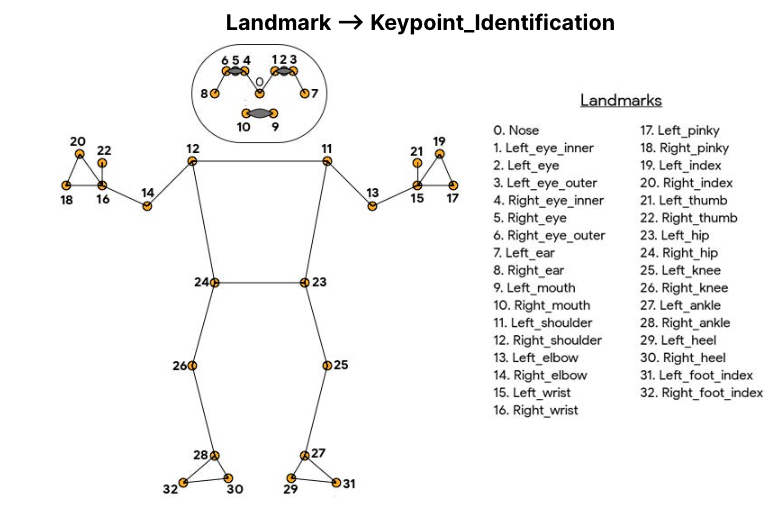

In [10]:
import cv2
import mediapipe as mp
import pandas as pd
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose    = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False)



# Load image
image_path = ".././images/Karate01.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image to detect pose landmarks
results = pose.process(image_rgb)

pose.close()

W0000 00:00:1732859728.254464   11134 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732859728.342006   11160 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [ ]:
results.pose_landmarks

# Draw point 

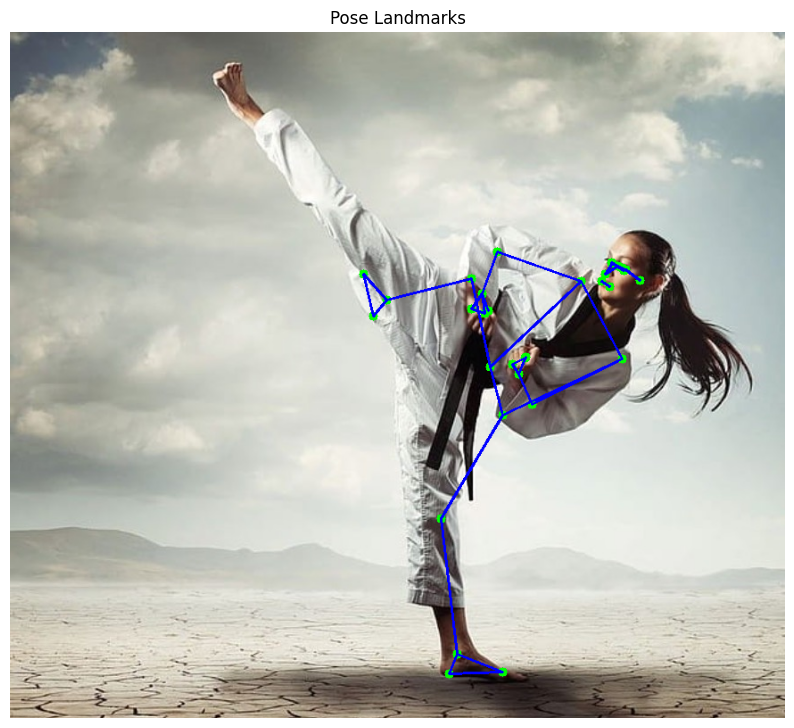

In [11]:

# Check if landmarks are detected
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark
    height, width, _ = image.shape
    
    # Draw landmarks using OpenCV
    for idx, landmark in enumerate(landmarks):
        x = int(landmark.x * width)
        y = int(landmark.y * height)
        
        # Draw circles for each landmark
        cv2.circle(image, (x, y), radius=5, color=(0, 255, 0), thickness=-1)
    
    # Draw connections (pose connections)
    pose_connections = mp_pose.POSE_CONNECTIONS
    for connection in pose_connections:
        start_idx, end_idx = connection
        start_point = results.pose_landmarks.landmark[start_idx]
        end_point = results.pose_landmarks.landmark[end_idx]
        
        start_x, start_y = int(start_point.x * width), int(start_point.y * height)
        end_x, end_y = int(end_point.x * width), int(end_point.y * height)
        
        # Draw lines between connected landmarks
        cv2.line(image, (start_x, start_y), (end_x, end_y), color=(255, 0, 0), thickness=2)

    
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title("Pose Landmarks")
    plt.axis("off")
    plt.show()


## Add point to pandas

In [12]:

    # Extract landmarks and save to DataFrame
    data = {
        "id": [],
        "x": [],
        "y": [],
        "z": [],
        "visibility": [],
    }
    
    for idx, landmark in enumerate(landmarks):
        data["id"].append(idx)
        data["x"].append(landmark.x)
        data["y"].append(landmark.y)
        data["z"].append(landmark.z)
        data["visibility"].append(landmark.visibility)
    
    # Convert to Pandas DataFrame
    df = pd.DataFrame(data)
    df
   

,id,x,y,z,visibility
0,0,0.768647,0.353005,-0.448880,0.999960
1,1,0.784775,0.341848,-0.465207,0.999869
2,2,0.789465,0.343900,-0.465546,0.999837
3,3,0.794490,0.346695,-0.465460,0.999829
4,4,0.777435,0.337572,-0.447161,0.999923
5,5,0.777018,0.336829,-0.447653,0.999944
6,6,0.776700,0.335975,-0.447935,0.999958
7,7,0.812741,0.361569,-0.449158,0.999857
8,8,0.792524,0.347969,-0.367142,0.999933
9,9,0.773492,0.370830,-0.432475,0.999879
